In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

In [2]:
# sklearn preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

# Chargement du Dataset

In [3]:
data = pd.read_csv('../nba_forecast/data/dataset_complet_X_y.csv')

In [4]:
data.rename(columns={"years": "nb_year_uni", "year": "year_athletic_test"}, inplace=True)

In [5]:
data.columns

Index(['season', 'school_name', 'conf_abbr', 'g', 'gs', 'mp', 'per', 'ts_pct',
       'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm',
       'nb_year_uni', 'year_athletic_test', 'position', 'body_fat_pct',
       'hand_length', 'hand_width', 'height_wo_shoes', 'height_w_shoes',
       'standing_reach', 'weight', 'wingspan', 'player_id', 'pos', 'off_score',
       'def_score', 'uni_off_score', 'uni_def_score', 'ratio_off',
       'ratio_def'],
      dtype='object')

# Recherche des lignes abérrantes

In [6]:
data.isna().sum()

season                 0
school_name            0
conf_abbr              0
g                      0
gs                     0
mp                     0
per                    0
ts_pct                 0
efg_pct                0
fg3a_per_fga_pct       0
fta_per_fga_pct        0
pprod                  0
orb_pct                0
drb_pct                0
trb_pct                0
ast_pct                0
stl_pct                0
blk_pct                0
tov_pct                0
usg_pct                0
ows                    0
dws                    0
ws                     0
ws_per_40              0
obpm                   0
dbpm                   0
bpm                    0
nb_year_uni            0
year_athletic_test    54
position               0
body_fat_pct          56
hand_length            0
hand_width             0
height_wo_shoes        0
height_w_shoes         0
standing_reach         0
weight                54
wingspan               0
player_id              0
pos                   89


In [7]:
data.isnull().sum()

season                 0
school_name            0
conf_abbr              0
g                      0
gs                     0
mp                     0
per                    0
ts_pct                 0
efg_pct                0
fg3a_per_fga_pct       0
fta_per_fga_pct        0
pprod                  0
orb_pct                0
drb_pct                0
trb_pct                0
ast_pct                0
stl_pct                0
blk_pct                0
tov_pct                0
usg_pct                0
ows                    0
dws                    0
ws                     0
ws_per_40              0
obpm                   0
dbpm                   0
bpm                    0
nb_year_uni            0
year_athletic_test    54
position               0
body_fat_pct          56
hand_length            0
hand_width             0
height_wo_shoes        0
height_w_shoes         0
standing_reach         0
weight                54
wingspan               0
player_id              0
pos                   89


# Constitution du Dataset de train

In [8]:
data_train = data[~data['off_score'].isnull()]

In [9]:
data_train.columns

Index(['season', 'school_name', 'conf_abbr', 'g', 'gs', 'mp', 'per', 'ts_pct',
       'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm',
       'nb_year_uni', 'year_athletic_test', 'position', 'body_fat_pct',
       'hand_length', 'hand_width', 'height_wo_shoes', 'height_w_shoes',
       'standing_reach', 'weight', 'wingspan', 'player_id', 'pos', 'off_score',
       'def_score', 'uni_off_score', 'uni_def_score', 'ratio_off',
       'ratio_def'],
      dtype='object')

In [10]:
data_train.drop(columns='pos',inplace=True)

/home/borisb/.pyenv/versions/3.8.6/envs/nba_forecast/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Constitution des Dataframes : *X*, *y_off* & *y_def*

In [11]:
X = data_train[['season', 'school_name', 'conf_abbr', 'g', 'gs', 'mp', 'per', 'ts_pct',
       'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm',
       'nb_year_uni', 'year_athletic_test', 'position', 'body_fat_pct',
       'hand_length', 'hand_width', 'height_wo_shoes', 'height_w_shoes',
       'standing_reach', 'weight', 'wingspan']]

In [12]:
y_off = data_train.pop('ratio_off')

In [13]:
y_def = data_train.pop('ratio_def')

# Optimisation des *dtype*

In [14]:
X.dtypes

season                 object
school_name            object
conf_abbr              object
g                       int64
gs                      int64
mp                      int64
per                   float64
ts_pct                float64
efg_pct               float64
fg3a_per_fga_pct      float64
fta_per_fga_pct       float64
pprod                 float64
orb_pct               float64
drb_pct               float64
trb_pct               float64
ast_pct               float64
stl_pct               float64
blk_pct               float64
tov_pct               float64
usg_pct               float64
ows                   float64
dws                   float64
ws                    float64
ws_per_40             float64
obpm                  float64
dbpm                  float64
bpm                   float64
nb_year_uni             int64
year_athletic_test     object
position               object
body_fat_pct          float64
hand_length             int64
hand_width              int64
height_wo_

In [15]:
# X.g = X.g.astype('int32')
# X.gs = X.gs.astype('int32')
# X.mp = X.mp.astype('int32')
# X.nb_year_uni = X.nb_year_uni.astype('int32')
# X.hand_length = X.hand_length.astype('int32')
# X.hand_width = X.hand_width.astype('int32')
# X.height_wo_shoes = X.height_wo_shoes.astype('int32')
# X.height_w_shoes = X.height_w_shoes.astype('int32')
# X.standing_reach = X.standing_reach.astype('int32')
# X.wingspan = X.wingspan.astype('int32')

X.g = X.g.astype('float64')
X.gs = X.gs.astype('float64')
X.mp = X.mp.astype('float64')
X.nb_year_uni = X.nb_year_uni.astype('float64')
X.hand_length = X.hand_length.astype('float64')
X.hand_width = X.hand_width.astype('float64')
X.height_wo_shoes = X.height_wo_shoes.astype('float64')
X.height_w_shoes = X.height_w_shoes.astype('float64')
X.standing_reach = X.standing_reach.astype('float64')
X.wingspan = X.wingspan.astype('float64')

/home/borisb/.pyenv/versions/3.8.6/envs/nba_forecast/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
X.dtypes

season                 object
school_name            object
conf_abbr              object
g                     float64
gs                    float64
mp                    float64
per                   float64
ts_pct                float64
efg_pct               float64
fg3a_per_fga_pct      float64
fta_per_fga_pct       float64
pprod                 float64
orb_pct               float64
drb_pct               float64
trb_pct               float64
ast_pct               float64
stl_pct               float64
blk_pct               float64
tov_pct               float64
usg_pct               float64
ows                   float64
dws                   float64
ws                    float64
ws_per_40             float64
obpm                  float64
dbpm                  float64
bpm                   float64
nb_year_uni           float64
year_athletic_test     object
position               object
body_fat_pct          float64
hand_length           float64
hand_width            float64
height_wo_

In [17]:
y_def.dtype

dtype('float64')

In [18]:
y_def.head()

0    0.88
1    0.96
2    0.86
3    0.73
4    0.81
Name: ratio_def, dtype: float64

# Constitution du *X_def* et du *X_off*

In [19]:
X.columns

Index(['season', 'school_name', 'conf_abbr', 'g', 'gs', 'mp', 'per', 'ts_pct',
       'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm',
       'nb_year_uni', 'year_athletic_test', 'position', 'body_fat_pct',
       'hand_length', 'hand_width', 'height_wo_shoes', 'height_w_shoes',
       'standing_reach', 'weight', 'wingspan'],
      dtype='object')

In [20]:
X_def = X[['drb_pct', 'stl_pct','blk_pct', 'dws', 'dbpm', 'nb_year_uni', 'year_athletic_test', 'position', 'body_fat_pct',
       'hand_length', 'hand_width', 'height_wo_shoes', 'height_w_shoes',
       'standing_reach', 'weight', 'wingspan']]

In [21]:
X_off = X[['season', 'school_name', 'conf_abbr', 'g', 'gs', 'mp', 'per', 'ts_pct',
       'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'orb_pct', 'ast_pct', 'tov_pct',
       'usg_pct', 'ows', 'obpm', 'nb_year_uni', 'year_athletic_test', 'position', 'body_fat_pct',
       'hand_length', 'hand_width', 'height_wo_shoes', 'height_w_shoes',
       'standing_reach', 'weight', 'wingspan']]

# Analyse des features

In [22]:
feat_categorical_nunique = X.select_dtypes(include='object').nunique()

In [23]:
feat_categorical_nunique

season                 7
school_name           85
conf_abbr             22
year_athletic_test     7
position               5
dtype: int64

In [24]:
feat_categorical_nunique.sum()

126

<AxesSubplot:>

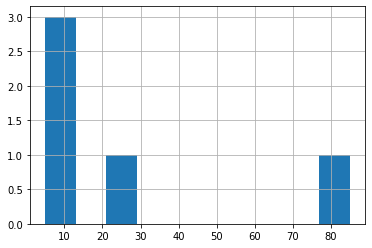

In [25]:
feat_categorical_nunique.hist()

In [26]:
feat_categorical_small = list(feat_categorical_nunique[feat_categorical_nunique < 20].index)

In [27]:
feat_categorical_small

['season', 'year_athletic_test', 'position']

In [28]:
feat_categorical_small_2 = list(feat_categorical_nunique[feat_categorical_nunique < 40].index)

In [29]:
feat_categorical_small_2

['season', 'conf_abbr', 'year_athletic_test', 'position']

In [30]:
feat_categorical_small.pop(0)
feat_categorical_small.pop(0)

'year_athletic_test'

In [31]:
feat_categorical_small

['position']

In [32]:
X_off = X_off.fillna(0)

Nous allons seulement garder la **'position'** comme feat_categorical

# Pipeline de preprocessing - Minimal Baseline

In [33]:
preproc_numerical_baseline = make_pipeline(
    SimpleImputer(missing_values=0),
    MinMaxScaler())

preproc_categorical_baseline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preproc_baseline = make_column_transformer(
    (preproc_numerical_baseline, make_column_selector(dtype_include=["int32", "float64"])),
    (preproc_categorical_baseline, feat_categorical_small),
    remainder="drop")

preproc_baseline

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(missing_values=0)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cd7e6df70>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['position'])])

In [34]:
shape_preproc_baseline = preproc_baseline.fit_transform(X_off).shape
shape_preproc_baseline

(245, 28)

## Définition du scorer

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# This is our metric to minimize
mse = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred))

# # This is our score to maximize
# rmsle_neg = make_scorer(lambda y_true, y_pred: -1 * mean_squared_log_error(y_true, y_pred)**0.5)
# # Equivalent formulation
# rmsle_neg = make_scorer(
#     lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5,
#     greater_is_better=False
# )

In [36]:
pipe_baseline = make_pipeline(preproc_baseline, Ridge())
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(missing_values=0)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2cd7e6df70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['position'])])),
                ('ridge', Ridge())])

## Baseline pour *y_off*

In [37]:
score_baseline = cross_val_score(pipe_baseline, X_off, y_off, cv=5, scoring=mse).mean()
score_baseline

0.01965304392441089

In [38]:
print(f' Baseline retenue: {mean_squared_error(y_off, [y_off.mean()]*len(y_off))}')

 Baseline retenue: 0.03532038317367764


## Feature sélection avec Lasso & Ridge avec preproc Baseline

In [39]:
import warnings

def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [40]:
#preproc_baseline.fit(X, y_def)
X_prepro_baseline = preproc_baseline.fit_transform(X_off)
# X_prepro = pd.DataFrame(X_prepro_pipe, columns=get_feature_names(preproc_baseline))
# X_prepro['pipeline-1__standing_reach'].value_counts()

In [41]:
#preproc_baseline.fit(X, y_def)
# X_prepro = preproc_baseline.transform(X)
# X_prepro = pd.DataFrame(X_prepro)

linreg = LinearRegression().fit(X_prepro_baseline, y_off)
ridge = Ridge(alpha=0.001).fit(X_prepro_baseline, y_off)
lasso = Lasso(alpha=0.001).fit(X_prepro_baseline, y_off)

coefs = pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_, index = get_feature_names(preproc_baseline)),
    "coef_ridge": pd.Series(ridge.coef_, index = get_feature_names(preproc_baseline)),
    "coef_lasso": pd.Series(lasso.coef_, index= get_feature_names(preproc_baseline))})\

coefs\
    .applymap(lambda x: int(x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

/tmp/ipykernel_391/1453787466.py:32: UserWarning: Transformer simpleimputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
/tmp/ipykernel_391/1453787466.py:32: UserWarning: Transformer minmaxscaler (type MinMaxScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


,coef_linreg,coef_ridge,coef_lasso
pipeline-1__g,0,0,0
pipeline-1__gs,0,0,0
pipeline-1__mp,0,0,0
pipeline-1__per,0,0,0
pipeline-1__ts_pct,0,0,0
pipeline-1__efg_pct,0,0,0
pipeline-1__fg3a_per_fga_pct,0,0,0
pipeline-1__fta_per_fga_pct,0,0,0
pipeline-1__orb_pct,0,0,0
pipeline-1__ast_pct,0,0,0


# Preprocessing itérations

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
feat_numerical = sorted(X_off.select_dtypes(include=["int32", "float64"]).columns)

In [44]:
preproc_numerical = make_pipeline(
    KNNImputer(missing_values=0.0),
    MinMaxScaler()
)

preproc_categorical = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preproc = make_column_transformer(
    (preproc_numerical, feat_numerical),
    (preproc_categorical, feat_categorical_small),
    remainder="drop")

preproc

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('knnimputer',
                                                  KNNImputer(missing_values=0.0)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['ast_pct', 'body_fat_pct', 'efg_pct',
                                  'fg3a_per_fga_pct', 'fta_per_fga_pct', 'g',
                                  'gs', 'hand_length', 'hand_width',
                                  'height_w_shoes', 'height_wo_shoes', 'mp',
                                  'nb_year_uni', 'obpm', 'orb_pct', 'ows',
                                  'per', 'standing_reach', 'tov_pct', 'ts_pct',
                                  'usg_pct', 'weight', 'wingspan']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['position'])])

# Target Engeneering

<AxesSubplot:xlabel='ratio_off', ylabel='Count'>

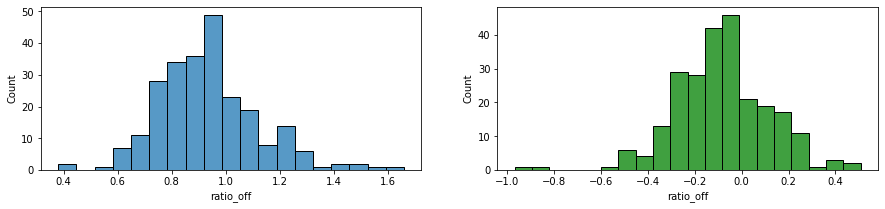

In [45]:
y_off_log = np.log(y_off)
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.histplot(y_off)
plt.subplot(1,2,2)
sns.histplot(y_off_log, color='green')

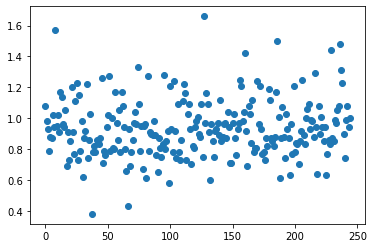

In [46]:
plt.scatter(range(len(y_off)), y_off)

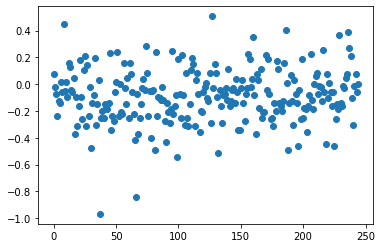

In [47]:
plt.scatter(range(len(y_off_log)), y_off_log)

In [48]:
pipe = make_pipeline(preproc, Ridge())
score = cross_val_score(pipe, X_off, y_off_log, cv=5, scoring=mse).mean()
score

0.02423860035073675

# Feature engeering

## Selector : SelectPercentile

In [49]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression

preproc_selector_sP = SelectPercentile(
    mutual_info_regression,
    percentile=50, # keep only 50% of all features
)

In [50]:
preproc_transformer = make_column_transformer(
    (preproc_numerical, feat_numerical),
    (preproc_categorical, feat_categorical_small),
    remainder="drop")

In [51]:
preproc_with_selectPercentile = make_pipeline(
    preproc_transformer,
    preproc_selector_sP
)

preproc_with_selectPercentile

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(missing_values=0.0)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['ast_pct', 'body_fat_pct',
                                                   'efg_pct',
                                                   'fg3a_per_fga_pct',
                                                   'fta_per_fga_pct', 'g', 'gs',
                                                   'hand_length', 'hand_width',
                                                   'height_w_shoes',
                                                   'height_wo_shoes', 'mp',
                                                   'nb_year_uni', 'obpm',
                                                   '...er',
                                                   'standing_reach', 'tov_pct',
                                                   'ts_pct', 'usg_pct',
                                                   'weight', 'wingspan']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['position'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function mutual_info_regression at 0x7f2cd588d940>))])

In [52]:
pipe = make_pipeline(preproc_with_selectPercentile, Ridge())
score = cross_val_score(pipe, X_off, y_off_log, cv=5, scoring=mse).mean()
score

0.025863389225726285

In [53]:
X_off_preproc = pd.DataFrame(preproc_transformer.fit_transform(X_off))

In [54]:
X_off_preproc.shape

(245, 28)

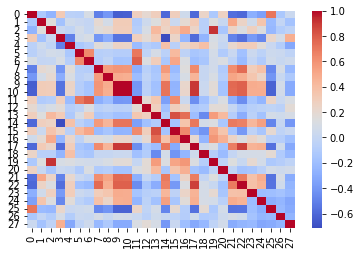

In [55]:
corr_num = X_off_preproc.corr()
sns.heatmap(corr_num, cmap='coolwarm', yticklabels=1, xticklabels=1);

In [56]:
X_off_preproc_2 = pd.DataFrame(preproc_with_selectPercentile.fit_transform(X_off, y_off), columns=np.array(get_feature_names(preproc_transformer))[preproc_selector_sP.get_support(indices=False).tolist()])

/tmp/ipykernel_391/1453787466.py:32: UserWarning: Transformer knnimputer (type KNNImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
/tmp/ipykernel_391/1453787466.py:32: UserWarning: Transformer minmaxscaler (type MinMaxScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
/tmp/ipykernel_391/1453787466.py:32: UserWarning: Transformer simpleimputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [57]:
X_off_preproc_2.shape

(245, 14)

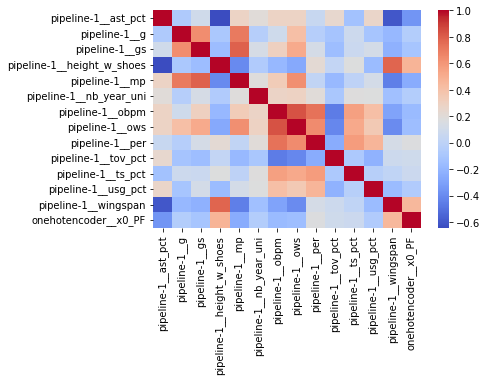

In [58]:
corr_num = X_off_preproc_2.corr()
sns.heatmap(corr_num, cmap='coolwarm');

## Selector : VarianceThreshold

Text(0.5, 1.0, 'Number of Feature Remaining')

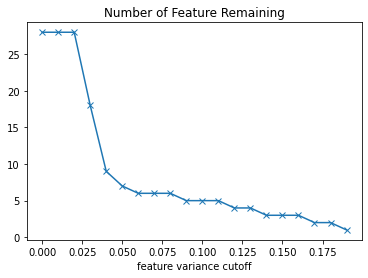

In [59]:
from sklearn.feature_selection import VarianceThreshold

def number_feature_remaining(cutoff=0):

    preproc_selector_vT = VarianceThreshold(cutoff)

    preproc_with_varianceThreshold = make_pipeline(
        preproc_transformer,
        preproc_selector_vT)

    return preproc_with_varianceThreshold.fit_transform(X_off).shape[1]

cutoff_values = np.arange(0, 0.2, 0.01)
plt.plot(cutoff_values, [number_feature_remaining(t) for t in cutoff_values], marker='x')
plt.xlabel("feature variance cutoff")
plt.title("Number of Feature Remaining")

☝️ We could decide to put a 0.035 threshold on the categorical features to divide their number by more than half

In [60]:
preproc_selector_vT_conf = VarianceThreshold(0.035)

In [61]:
preproc_with_varianceThreshold = make_pipeline(
    preproc_transformer,
    preproc_selector_vT_conf
)

In [62]:
pipe = make_pipeline(preproc_with_varianceThreshold, Ridge())
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse).mean()
score

0.019860488294318034

# Model Itération

In [63]:
# SOLUTION
allow_grid_searching = False # use True to activate girdsearch in the notebook cells below

# Cache the preprocessing step of the pipeline
from tempfile import mkdtemp
from shutil import rmtree
cachedir = mkdtemp()

## Linear Models (Lasso, Ridge, ElasticNet, SGDRegressor...)

### Linear Regression

In [64]:
pipe = make_pipeline(preproc, LinearRegression())
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse).mean()
score

0.021115326282419262

In [65]:
pipe = make_pipeline(preproc_with_selectPercentile, LinearRegression())
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse).mean()
score

0.021314423577701476

In [66]:
pipe = make_pipeline(preproc_with_varianceThreshold, LinearRegression())
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse).mean()
score

0.020818909940112602

### Ridge

In [67]:
pipe = make_pipeline(preproc, Ridge())
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse).mean()
score

0.01958043409686261

In [68]:
pipe = make_pipeline(preproc_with_selectPercentile, Ridge())
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse).mean()
score

0.0208278492617427

In [69]:
pipe = make_pipeline(preproc_with_varianceThreshold, Ridge())
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse).mean()
score

0.019860488294318034

### Lasso

In [70]:
pipe = make_pipeline(preproc, Lasso())
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse).mean()
score

0.03554122240733028

In [71]:
pipe = make_pipeline(preproc_with_varianceThreshold, Lasso())
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse).mean()
score

0.03554122240733028

## KNN

In [72]:
model = KNeighborsRegressor()
pipe_knn = make_pipeline(preproc_with_varianceThreshold, model)

In [73]:
scores = cross_val_score(pipe_knn, X_off, y_off, cv=5, scoring=mse)
scores.mean()

0.02545226122448979

In [74]:
param_grid =  {'kneighborsregressor__n_neighbors': [3,4,5,6,7,8,9,10,15,20,30]}
search_knn = GridSearchCV(pipe_knn, param_grid=param_grid, 
                          cv=10, n_jobs=-1, verbose=2, scoring=mse)

search_knn.fit(X_off, y_off);
print(search_knn.best_params_)
search_knn.best_score_

Fitting 10 folds for each of 11 candidates, totalling 110 fits
{'kneighborsregressor__n_neighbors': 30}


0.02807638216666667

## SVM

In [75]:
model = SVR(kernel='linear')
pipe_svm = make_pipeline(preproc, model, memory=cachedir)
cross_val_score(pipe_svm, X_off, y_off, cv=5, scoring=mse).mean()

0.021017334813605716

In [76]:
model = SVR(kernel='rbf', C = 10)
pipe_svm_rbf = make_pipeline(preproc, model, memory=cachedir)
cross_val_score(pipe_svm_rbf, X_off, y_off, cv=5, scoring=mse).mean()

0.025485268222262887

In [77]:
param_grid =  {'svr__C': [0.5, 0.7, 1, 2, 5, 10],
                  'svr__epsilon': [0.01, 0.05, 0.1, 0.2, 0.5],
                   #'svr__coef0': [0.0, 0.1, 0.5,1],
                  }
search_svm_rbf = GridSearchCV(pipe_svm, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=2, scoring=mse)

search_svm_rbf.fit(X_off, y_off);
svm_rbf_best = search_svm_rbf.best_estimator_
print(search_svm_rbf.best_params_)
search_svm_rbf.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'svr__C': 0.5, 'svr__epsilon': 0.5}


0.03413365756109844

## Trees

In [78]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=50, min_samples_leaf=20)
pipe = make_pipeline(preproc_with_varianceThreshold, model, memory=cachedir)
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse)
score.mean()

0.02392849748250015

## Random Forest

In [79]:
model = RandomForestRegressor(max_depth=50,min_samples_leaf=20)
pipe = make_pipeline(preproc_with_varianceThreshold, model, memory=cachedir)
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse)
score.mean()

0.021252565440526193

## Boosted Trees

In [80]:
model = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=None))

pipe = make_pipeline(preproc, model, memory=cachedir)
score = cross_val_score(pipe, X_off, y_off, cv=5, scoring=mse)
#print(score.std())
score.mean()

0.023405714285714283

In [81]:
model = GradientBoostingRegressor(n_estimators=100, verbose=0)
pipe_gb = make_pipeline(preproc, model, memory=cachedir)
score = cross_val_score(pipe_gb, X_off, y_off, cv=5, scoring=mse)
#print(score.std())
score.mean()

0.025351450235725465

## Stacking

In [82]:
gboost = GradientBoostingRegressor(n_estimators=100)
ridge = Ridge()
svm = SVR(C=1, epsilon=0.05)
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=None, max_features='log2'), loss='square', n_estimators=200)


model = VotingRegressor(
    estimators = [("gboost", gboost),("adaboost", adaboost),("ridge", ridge), ("svm_rbf", svm)],
    weights = [0,5,10,0], # to equally weight the two models
    n_jobs=-1
)

pipe_ensemble = make_pipeline(preproc_with_varianceThreshold, model, memory=cachedir)

score = cross_val_score(pipe_ensemble, X_off, y_off, cv=50, scoring=mse, n_jobs=-1)
#print(score.std())
score.mean()

0.018928152705639644

### XGBOOST

In [83]:
from xgboost import XGBRegressor

In [84]:
# Create eval test just for early stopping purpose (XGBOOST and Deep Learning)
X_train, X_eval, y_train, y_eval = train_test_split(X_off,y_off,random_state=42)

In [85]:
# Instanciate model
model_xgb = XGBRegressor(max_depth=10, n_estimators=300, learning_rate=0.05)

In [86]:
# Option 1: Integrate XGB into Sklearn's pipeline
# It allows to GridSearchCV its best hyperparams
pipe_xgb = make_pipeline(preproc_with_varianceThreshold, model_xgb)
cross_val_score(pipe_xgb,X_off,y_off,cv=5,scoring=mse,n_jobs=-1).mean()

0.02725146069653475

In [87]:
# Option 2: Use XGBoost Library to fit it
# It allows to use an early_stopping criteria with a Train/Val slit
X_train_preproc = preproc.fit_transform(X_train, y_train)
X_eval_preproc = preproc.transform(X_eval)

model_xgb.fit(X_train_preproc, y_train, verbose=False,
        eval_set=[(X_train_preproc, y_train), (X_eval_preproc, y_eval)],
        eval_metric=mse,
        early_stopping_rounds=10)

# retrieve performance metrics
results = model_xgb.evals_result()
epochs = len(results['validation_0']["mse"])
x_axis = range(0, epochs)

# plot rmsle loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mse'], label='Train')
ax.plot(x_axis, results['validation_1']['mse'], label='Val')
ax.legend(); plt.ylabel('MSE (of log)'); plt.title('XGBoost Log Loss')

print("Best Validation Score", min(results['validation_1']['mse']))

TypeError: __call__() missing 1 required positional argument: 'y_true'

# PCA

In [ ]:
#plot decision map

# Ridge - Grid Search CV

In [90]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'pipeline__variancethreshold': [VarianceThreshold(threshold=0.01),VarianceThreshold(threshold=0.02),VarianceThreshold(threshold=0.03)],
    #'pipeline__columntransformer__pipeline-1__knnimputer__add_indicator': False,
    #'pipeline__columntransformer__pipeline-1__knnimputer__copy': True,
    #'pipeline__columntransformer__pipeline-1__knnimputer__metric': ['uniform', 'distance'],
    #'pipeline__columntransformer__pipeline-1__knnimputer__missing_values': 0.0,
    'pipeline__columntransformer__pipeline-1__knnimputer__n_neighbors': [5,10,15,20,25,30,40,50],
    'pipeline__columntransformer__pipeline-1__knnimputer__weights': ['uniform', 'distance'],
    'ridge__alpha': [0.001, 0.005, 0.1, 0.5, 0.8, 0.9, 1.0, 1.2],
    #'ridge__copy_X': True,
    #'ridge__fit_intercept': True,
    #'ridge__max_iter': [1000,2000,3000],
    #'ridge__normalize': [True,False],
    #'ridge__random_state': None,
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'ridge__tol': [0.1, 0.01, 0.05, 0.001, 0.0001]}


pipe = make_pipeline(preproc_with_varianceThreshold, Ridge())

modele_ = GridSearchCV(pipe, parameters)
modele_.fit(X_off, y_off)


modele_.best_params_
best_estimator = modele_.best_estimator_

In [91]:
best_estimator

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('knnimputer',
                                                                                    KNNImputer(missing_values=0.0,
                                                                                               n_neighbors=40,
                                                                                               weights='distance')),
                                                                                   ('minmaxscaler',
                                                                                    MinMaxScaler())]),
                                                                   ['ast_pct',
                                                                    'body_fat_pct',
                                                                    'efg_pct',
                                                                    'fg3a_per_fga_pct',
                                                                    'fta_per_fga_pct',
                                                                    'g', 'gs',
                                                                    'hand_length',
                                                                    'hand_width',...
                                                                    'ows',
                                                                    'per',
                                                                    'standing_reach',
                                                                    'tov_pct',
                                                                    'ts_pct',
                                                                    'usg_pct',
                                                                    'weight',
                                                                    'wingspan']),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['position'])])),
                                 ('variancethreshold',
                                  VarianceThreshold(threshold=0.01))])),
                ('ridge', Ridge(alpha=1.2, solver='sag', tol=0.1))])

In [92]:
modele_.best_params_

{'pipeline__columntransformer__pipeline-1__knnimputer__n_neighbors': 40,
 'pipeline__columntransformer__pipeline-1__knnimputer__weights': 'distance',
 'pipeline__variancethreshold': VarianceThreshold(threshold=0.01),
 'ridge__alpha': 1.2,
 'ridge__solver': 'sag',
 'ridge__tol': 0.1}

In [93]:
score = cross_val_score(best_estimator, X_off, y_off, cv=5, scoring=mse)
#print(score.std())
score.mean()

0.019416670950643856

In [ ]:
# {'pipeline__columntransformer__pipeline-1__knnimputer__n_neighbors': 40,
#  'pipeline__columntransformer__pipeline-1__knnimputer__weights': 'distance',
#  'pipeline__variancethreshold': VarianceThreshold(threshold=0.01),
#  'ridge__alpha': 1.2,
#  'ridge__solver': 'sag',
#  'ridge__tol': 0.1}